# importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import metrics
from sklearn import model_selection
%matplotlib inline

# load dataset

In [2]:
wine = pd.read_csv('C:/Users/Admin/Desktop/subjects/data_mining/data_mining_project/wine_quality_analysis/winequalityN.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


# finding null values in the dataset

In [4]:
wine.isnull().sum()

fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

# filling null values with the mean of that column

In [5]:
mean_value=wine['fixed acidity'].mean()
mean_value=wine['volatile acidity'].mean()
mean_value=wine['citric acid'].mean()
mean_value=wine['residual sugar'].mean()
mean_value=wine['chlorides'].mean()
mean_value=wine['pH'].mean()
mean_value=wine['sulphates'].mean()
wine['fixed acidity'].fillna(value=mean_value, inplace=True)
wine['volatile acidity'].fillna(value=mean_value, inplace=True)
wine['citric acid'].fillna(value=mean_value, inplace=True)
wine['residual sugar'].fillna(value=mean_value, inplace=True)
wine['chlorides'].fillna(value=mean_value, inplace=True)
wine['pH'].fillna(value=mean_value, inplace=True)
wine['sulphates'].fillna(value=mean_value, inplace=True)

In [6]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# calculating total values of quality range 3 to 9

In [7]:
wine['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

# bar graph visualization of quality with other features

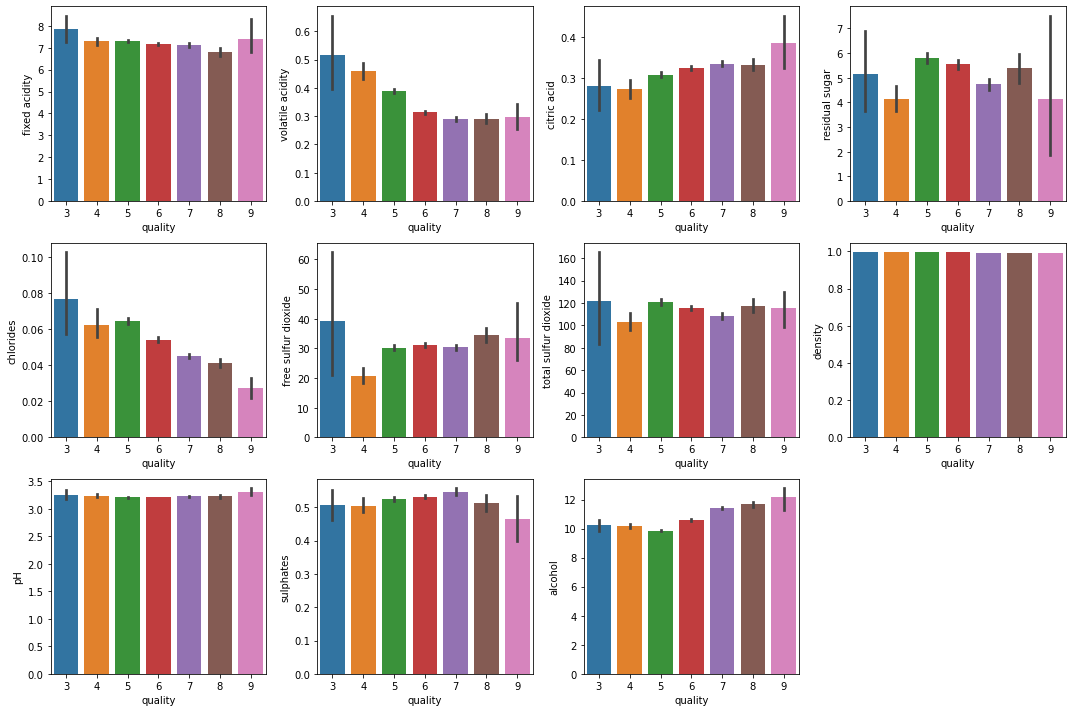

In [8]:
fig = plt.figure(figsize=(15,10))

plt.subplot(3,4,1)
sns.barplot(x='quality',y='fixed acidity',data=wine)

plt.subplot(3,4,2)
sns.barplot(x='quality',y='volatile acidity',data=wine)

plt.subplot(3,4,3)
sns.barplot(x='quality',y='citric acid',data=wine)

plt.subplot(3,4,4)
sns.barplot(x='quality',y='residual sugar',data=wine)

plt.subplot(3,4,5)
sns.barplot(x='quality',y='chlorides',data=wine)

plt.subplot(3,4,6)
sns.barplot(x='quality',y='free sulfur dioxide',data=wine)

plt.subplot(3,4,7)
sns.barplot(x='quality',y='total sulfur dioxide',data=wine)

plt.subplot(3,4,8)
sns.barplot(x='quality',y='density',data=wine)

plt.subplot(3,4,9)
sns.barplot(x='quality',y='pH',data=wine)

plt.subplot(3,4,10)
sns.barplot(x='quality',y='sulphates',data=wine)

plt.subplot(3,4,11)
sns.barplot(x='quality',y='alcohol',data=wine)

plt.tight_layout()
plt.savefig('output.jpg',dpi=1000)

# Dividing into good and bad category

In [9]:
#from 3 to 6. it is considered bad and above that it is good as 9 is the max value of quality
ranges = (3,6.5,9) 
groups = ['bad','good']
wine['quality'] = pd.cut(wine['quality'],bins=ranges,labels=groups)

# encoding bad quality == 0 & good quality == 1

In [10]:
le = LabelEncoder()
wine['quality'] = le.fit_transform(wine['quality'])
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [11]:
wine['quality'].value_counts()

0    5190
1    1277
2      30
Name: quality, dtype: int64

# concating good and bad quality into new dataframe

In [12]:
good_quality = wine[wine['quality']==1]
bad_quality = wine[wine['quality']==0]

bad_quality = bad_quality.sample(frac=1)
bad_quality = bad_quality[:len(good_quality)]

new_df = pd.concat([good_quality,bad_quality])
new_df = new_df.sample(frac=1)
#new_df.drop(['type'],inplace=True,axis=1)

In [13]:
new_df['quality'].value_counts()

1    1277
0    1277
Name: quality, dtype: int64

# correlation for quality  

In [14]:
new_df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.452090
citric acid             0.071101
sulphates               0.040418
pH                      0.037525
free sulfur dioxide     0.036925
total sulfur dioxide   -0.059941
residual sugar         -0.061115
fixed acidity          -0.061430
chlorides              -0.212082
volatile acidity       -0.220034
density                -0.322078
Name: quality, dtype: float64

# heatmap visualization of correlation

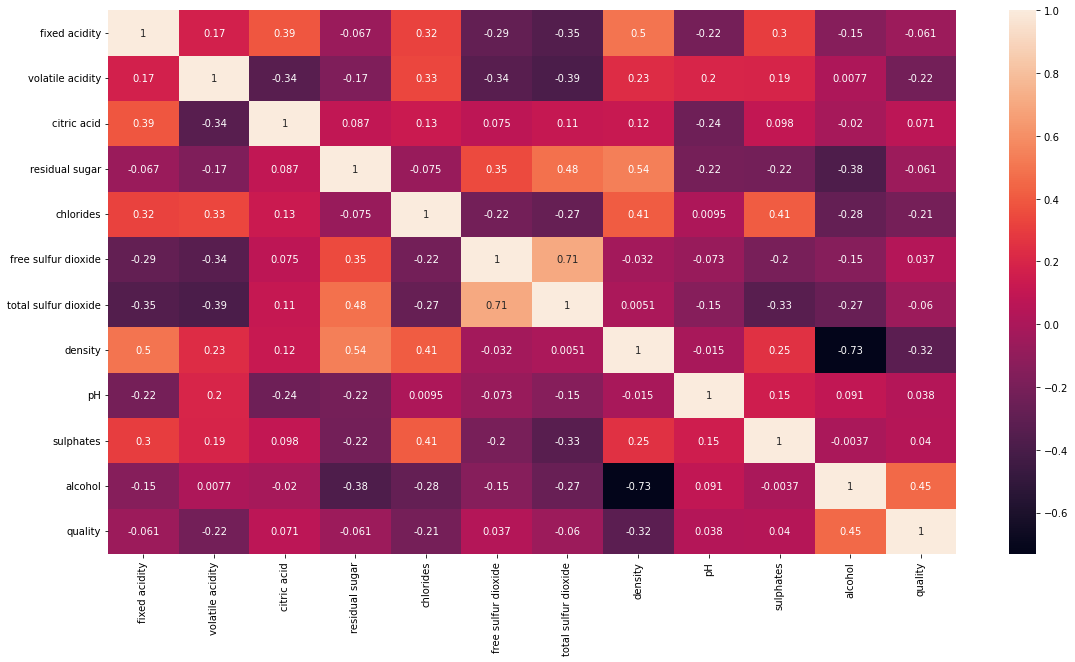

In [15]:
plt.figure(figsize=[19,10])
sns.heatmap(new_df.corr(),annot=True);

# splitting data into training and testing

In [17]:
from sklearn.model_selection import train_test_split

#new_df.loc[:, new_df.columns != 'type']
X = new_df.drop('quality',axis=1) 
y = new_df['quality']

#X.drop('type',axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


# random forest classifier

In [32]:
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

# predicting accuracy of models and classification report

In [40]:
y_pred = np.around(model.predict(X_test))
accuracy_rfc = accuracy_score(y_test, y_pred)
print("Accuracy_rfc:", accuracy_rfc)

Accuracy_rfc: 0.8265971316818774


In [34]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       381
           1       0.81      0.85      0.83       386

    accuracy                           0.83       767
   macro avg       0.83      0.83      0.83       767
weighted avg       0.83      0.83      0.83       767



# K Nearest Neighbour

In [22]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [35]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [39]:
accuracy_knn = accuracy_score(y_test, y_pred)
print("Accuracy_knn:", accuracy_knn)

Accuracy_knn: 0.8265971316818774


In [24]:
#y_pred = np.around(model.predict(X_test))
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       381
           1       0.79      0.83      0.81       386

    accuracy                           0.81       767
   macro avg       0.81      0.81      0.81       767
weighted avg       0.81      0.81      0.81       767



# Support Vector Machine- SVC

In [25]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [41]:
y_pred = svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred)
print("Accuracy_svc:", accuracy_svc)

Accuracy_svc: 0.6153846153846154


In [26]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       381
           1       0.79      0.83      0.81       386

    accuracy                           0.81       767
   macro avg       0.81      0.81      0.81       767
weighted avg       0.81      0.81      0.81       767



# predicting quality of wine

In [27]:
input_data = (8.9,0.62,0.19,3.9,0.17,51,148,0.9986,3.17,0.93,9.2)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction.reshape(-1,1))

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[[0]]
Bad Quality Wine


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# comparison of algorithms

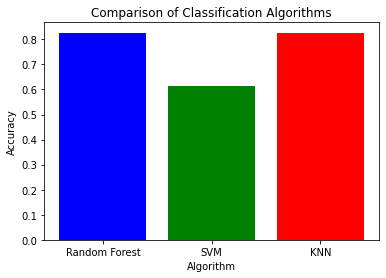

In [45]:
# Create a barplot
colors = ['b', 'g', 'r']
labels = ['Random Forest', 'SVM', 'KNN']
accuracy_scores = [accuracy_rfc, accuracy_svc, accuracy_knn]

plt.bar(labels, accuracy_scores, color=colors)

# Add labels and title
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Comparison of Classification Algorithms')

# Show the plot
plt.show()
